# Support Vector Machine (SVR) – Regression Example

This notebook demonstrates **Support Vector Regression (SVR)**  
to understand how SVM works on a **continuous target variable**.

Dataset:
- 7 input features
- 1 continuous target
- 5000 rows

Goal:
- Learn SVM working principle
- Not focused on high accuracy


In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error


## 📂 Load Dataset


In [29]:
df = pd.read_csv("SVM regression dataset.csv")
df.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,target
0,77.132064,2.075195,63.364823,74.880388,49.850701,22.479665,19.806286,55.439238
1,76.053071,16.911084,8.833981,68.535982,95.339335,0.394827,51.219226,123.713515
2,81.262096,61.252607,72.175532,29.187607,91.777412,71.457578,54.254437,172.090876
3,14.217005,37.334076,67.413362,44.183317,43.401399,61.776698,51.313824,39.353349
4,65.039718,60.103895,80.522320,52.164715,90.864888,31.923609,9.045935,-5.004996


## 🔍 Dataset Overview


In [30]:
df.shape


(5000, 8)

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  5000 non-null   float64
 1   feature2  5000 non-null   float64
 2   feature3  5000 non-null   float64
 3   feature4  5000 non-null   float64
 4   feature5  5000 non-null   float64
 5   feature6  5000 non-null   float64
 6   feature7  5000 non-null   float64
 7   target    5000 non-null   float64
dtypes: float64(8)
memory usage: 312.6 KB


In [32]:
df.isnull().sum()


feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
target      0
dtype: int64

## 🎯 Features and Target


In [33]:
X = df.drop("target", axis=1)
y = df["target"]


## 🔀 Train-Test Split
80% → Training  
20% → Testing


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## ⚖ Feature Scaling

SVM is **distance-based**,  
so features MUST be scaled.


In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🤖 Support Vector Regression (SVR)

Key parameters:
- kernel = 'rbf'
- C → penalty
- epsilon → margin tolerance


In [36]:
svr_model = SVR(
    kernel='rbf',
    C=100,
    epsilon=0.1
)

svr_model.fit(X_train_scaled, y_train)


,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",100
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


## 📈 Predictions


In [37]:
y_pred = svr_model.predict(X_test_scaled)


## 📊 Model Evaluation


In [38]:
r2 = r2_score(y_test, y_pred)
r2


0.6984169004907117

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(51.31472654648953)

## 📉 Actual vs Predicted


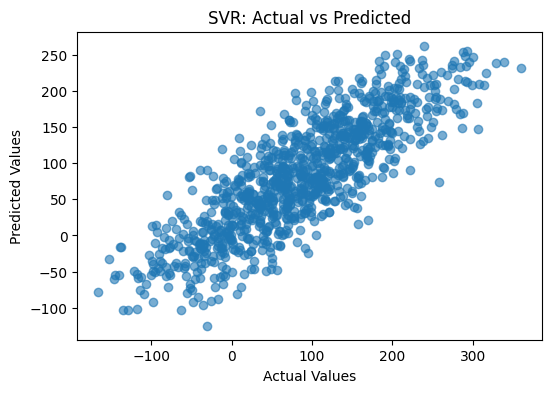

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.show()


## 🧠 How SVM Works (Simple)

- SVR tries to fit a line **within a margin (epsilon)**
- Errors inside the margin are ignored
- Only **support vectors** affect the model
- Kernel trick allows non-linear fitting
